In [2]:
import pandas as pd
import numpy as np
import math

In [4]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [5]:
#Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego
#czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [8]:
mental_illness_race_sum = pd.crosstab(df['race'], df['signs_of_mental_illness'])
print(mental_illness_race_sum)

signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


In [10]:
pivot_table = df.pivot_table(index='race',
                             columns='signs_of_mental_illness',
                             values='id',
                             aggfunc='count',
                             fill_value=0)
print(pivot_table)

signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


In [11]:
#Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej 
#dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [15]:
pivot_table = df.pivot_table(index='race',
                             columns='signs_of_mental_illness',
                             values='id',
                             aggfunc='count',
                             fill_value=0)
pivot_table.columns = ['No Mental Illness', 'Mental Illness']
pivot_table['overall']=pivot_table['No Mental Illness']+pivot_table['Mental Illness']
pivot_table['Mental Illness %']=(pivot_table['Mental Illness']/pivot_table['overall'])*100
mental_illness_max=pivot_table['Mental Illness %'].idxmax()
percent_max=pivot_table['Mental Illness %'].max()
print(pivot_table)
print(f"Rasa która charakteryzuje się największym odsetkiem choroby psychicznej to: {mental_illness_max}, {percent_max}%")

      No Mental Illness  Mental Illness  overall  Mental Illness %
race                                                              
A                    69              24       93         25.806452
B                  1114             184     1298         14.175655
H                   745             157      902         17.405765
N                    64              14       78         17.948718
O                    37              11       48         22.916667
W                  1763             713     2476         28.796446
Rasa która charakteryzuje się największym odsetkiem choroby psychicznej to: W, 28.796445880452342%


In [16]:
#Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
#Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

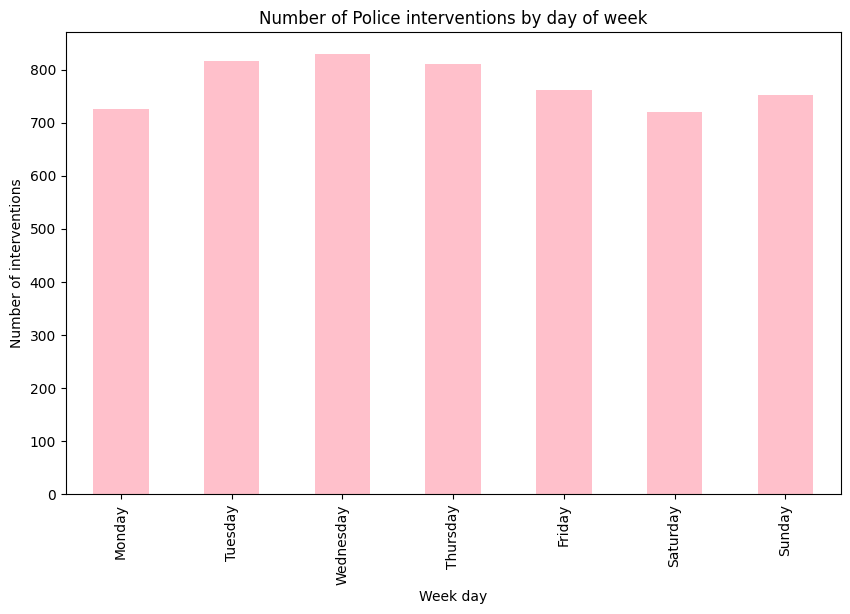

In [23]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
df['week_day'] = df['date'].dt.dayofweek
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['week_day'] = df['week_day'].map(day_map)
day_counts = df['week_day'].value_counts().reindex(day_map.values())
plt.figure(figsize=(10,6))
day_counts.plot(kind='bar', color='pink')
plt.title('Number of Police interventions by day of week')
plt.xlabel('Week day')
plt.ylabel('Number of interventions')
plt.show()

In [35]:
#Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów.

In [32]:
population_df = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')[0]
population_df

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [46]:
abbreviation_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')[1]
abbreviation_df

Name         Status of region  \
                                      Name         Status of region   
0                 United States of America            Federal state   
1                                  Alabama                    State   
2                                   Alaska                    State   
3                                  Arizona                    State   
4                                 Arkansas                    State   
..                                     ...                      ...   
73                                Nebraska  Obsolete postal code[g]   
74                Northern Mariana Islands  Obsolete postal code[h]   
75                       Panama Canal Zone     Obsolete postal code   
76                      Philippine Islands     Obsolete postal code   
77  Trust Territory of the Pacific Islands     Obsolete postal code   

                  ISO               ANSI                     \
   Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0          US USA 840                 US                0.0   
1               US-AL                 AL                1.0   
2               US-AK                 AK                2.0   
3               US-AZ                 AZ                4.0   
4               US-AR                 AR                5.0   
..                ...                ...                ...   
73                NaN                NaN                NaN   
74                NaN                NaN                NaN   
75         PZ PCZ 594                NaN                NaN   
76     PH PHL 608[11]                NaN                NaN   
77         PC PCI 582                NaN                NaN   

                 USPS               USCG     GPO      AP Other abbreviations  
   Unnamed: 5_level_1 Unnamed: 6_level_1     GPO      AP Other abbreviations  
0                 NaN                NaN    U.S.    U.S.              U.S.A.  
1                  AL                 AL    Ala.    Ala.                 NaN  
2                  AK                 AK  Alaska  Alaska              Ak.[2]  
3                  AZ                 AZ   Ariz.   Ariz.                 NaN  
4                  AR                 AR    Ark.    Ark.                 NaN  
..                ...                ...     ...     ...                 ...  
73                 NB                NaN     NaN     NaN                 NaN  
74                 CM                NaN     NaN     NaN                 NaN  
75                 CZ                NaN     NaN     NaN                 NaN  
76                 PI                NaN     NaN     NaN                 NaN  
77                 TT                NaN     NaN     NaN                 NaN  

[78 rows x 10 columns]

In [ ]:
#Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło 
#w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [55]:
print("Kolumny w abbreviation_df:", abbreviation_df.columns)
print("Pierwsze kilka wierszy abbreviation_df:\n", abbreviation_df.head())

print("\nKolumny w population_df:", population_df.columns)
print("Pierwsze kilka wierszy population_df:\n", population_df.head())

Kolumny w abbreviation_df: Index(['Name', 'Status of region', 'Abbreviation', 'ANSI', 'ANSI', 'USPS',
       'USCG', 'GPO', 'AP', 'Other abbreviations'],
      dtype='object')
Pierwsze kilka wierszy abbreviation_df:
                        Name Status of region Abbreviation  ANSI  ANSI USPS  \
0  United States of America    Federal state   US USA 840    US   0.0  NaN   
1                   Alabama            State        US-AL    AL   1.0   AL   
2                    Alaska            State        US-AK    AK   2.0   AK   
3                   Arizona            State        US-AZ    AZ   4.0   AZ   
4                  Arkansas            State        US-AR    AR   5.0   AR   

  USCG     GPO      AP Other abbreviations  
0  NaN    U.S.    U.S.              U.S.A.  
1   AL    Ala.    Ala.                 NaN  
2   AK  Alaska  Alaska              Ak.[2]  
3   AZ   Ariz.   Ariz.                 NaN  
4   AR    Ark.    Ark.                 NaN  

Kolumny w population_df: Index(['State', 'S

In [ ]:
#to jest jak mi sie wydawalo poprawne rozwiazanie ale nie wiem dlaczego w tabeli pokazuje mi wszędzie 0, nie zliczyło liczby incydentów.
#zapisalam do csv ten plik i upewnilam sie czy wszedzie rzeczywiscie jest 0 i niestety tak.
#Ten podpunkt jest bardzo trudny i zlozony.

In [160]:
import numpy as np
import pandas as pd

incidents_df = pd.read_csv('fatal-police-shootings-data.csv')
state_incident_counts = incidents_df['state'].value_counts().reset_index()
state_incident_counts.columns = ['State', 'IncidentCount']
print(state_incident_counts)
#ładnie pokazuje liczbę incydentów na dany stan

abbreviation_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')[1]
population_df = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')[0]

abbreviation_df.columns = [col[0] if isinstance(col, tuple) else col for col in abbreviation_df.columns]
abbreviation_df = abbreviation_df.rename(columns={'Name': 'State', 'USPS': 'Shortcut'})
abbreviation_df = abbreviation_df[['State', 'Shortcut']]

population_df = population_df.iloc[:, [2, 3]]
population_df.columns = ['State', 'Population']

merged_table_df = pd.merge(population_df, abbreviation_df, on='State', how='left')

print("Połączone dane:", merged_table_df.head()) #merge dwóch tabel na podstawie state powiódł się

merged_df = pd.merge(merged_table_df, state_incident_counts, on='State', how='left')
print(merged_df) #dlaczego tutaj wszędzie jest NaN? przecież jest shortcut odpowiadający nazwie stanu? powinny być dane do incident_counts

merged_df['IncidentsPer1000'] = (merged_df['IncidentCount'] / merged_df['Population'])* 1000
result_df = merged_df[['State', 'Population', 'IncidentCount', 'IncidentsPer1000']]
result_df

   State  IncidentCount
0     CA            799
1     TX            481
2     FL            350
3     AZ            254
4     CO            195
5     GA            182
6     OK            164
7     NC            156
8     OH            155
9     WA            152
10    MO            141
11    TN            139
12    LA            109
13    PA            108
14    NM            106
15    AL            104
16    IL            104
17    NY            101
18    NV             96
19    IN             95
20    VA             95
21    KY             95
22    WI             91
23    OR             88
24    SC             88
25    AR             83
26    MD             79
27    MI             78
28    NJ             68
29    MS             65
30    MN             61
31    UT             60
32    WV             54
33    KS             50
34    ID             42
35    AK             39
36    MA             35
37    IA             32
38    MT             31
39    HI             30
40    NE        

,State,Population,IncidentCount,IncidentsPer1000
0,California,39538223,NaN,NaN
1,Texas,30145505,NaN,NaN
2,Florida,21538187,NaN,NaN
3,New York,20201249,NaN,NaN
4,Pennsylvania,13002700,NaN,NaN
...,...,...,...,...
57,Northern Mariana Islands,47329,NaN,NaN
58,Contiguous United States,329260619,NaN,NaN
59,The fifty states,330759736,NaN,NaN
60,Fifty states + D.C.,331449281,NaN,NaN
